# Detec line methods

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def find_least_squares_line(lines):
    # Extract start and end points
    start_points = lines[:, :, :2].reshape(-1, 2)
    end_points = lines[:, :, 2:].reshape(-1, 2)
    
    # Combine start and end points
    all_points = np.vstack((start_points, end_points))
    
    # Perform least squares fitting
    A = np.vstack([all_points[:, 0], np.ones(len(all_points))]).T
    m, c = np.linalg.lstsq(A, all_points[:, 1], rcond=None)[0]
    
    # Calculate the new line's start and end points
    x_start = np.min(all_points[:, 0])
    x_end = np.max(all_points[:, 0])
    y_start = m * x_start + c
    y_end = m * x_end + c
    
    return np.array([x_start, y_start, x_end, y_end])

def average_line_segment(lines):
    avg_x1 = np.mean(lines[:, :, 0])
    avg_y1 = np.mean(lines[:, :, 1])
    avg_x2 = np.mean(lines[:, :, 2])
    avg_y2 = np.mean(lines[:, :, 3])
    return np.array([avg_x1, avg_y1, avg_x2, avg_y2])

def longest_line(lines):
    # Calculate the length of each line segment
    lengths = np.sqrt((lines[:, :, 2] - lines[:, :, 0])**2 + (lines[:, :, 3] - lines[:, :, 1])**2)
    # Find the index of the longest line
    longest_index = np.argmax(lengths)
    # Return the longest line
    return lines[longest_index][0]


[ 0.  2.  3. 11.]
[0.         1.16666667 3.5        8.83333333]
[0.         1.36092715 4.         9.67880795]


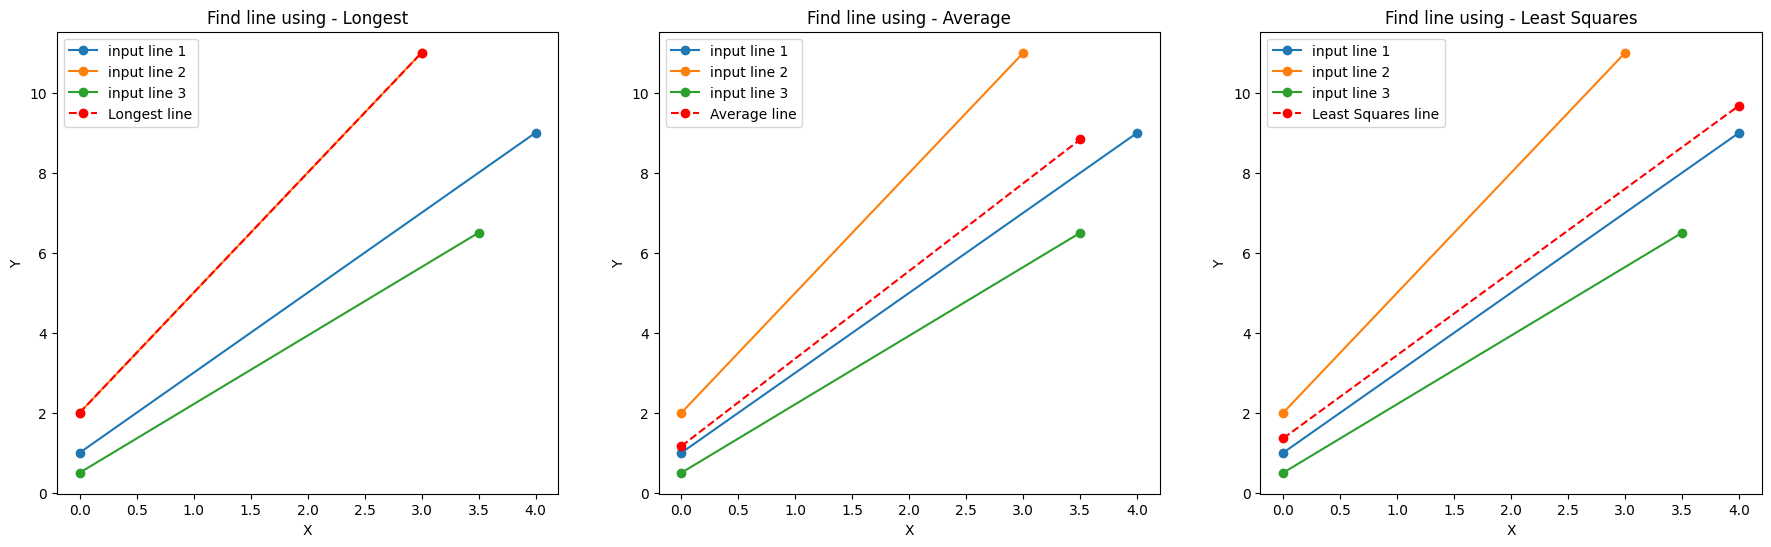

In [29]:
lines = np.array([[[0, 1, 4, 9]], [[0, 2, 3, 11]], [[0, 0.5, 3.5, 6.5]]])

# Calculate the output lines
least_squares_line = find_least_squares_line(lines)
average_line = average_line_segment(lines)
longest = longest_line(lines)

# Plotting the lines
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

func_map = {'Longest': longest_line, 'Average': average_line_segment, 'Least Squares': find_least_squares_line}
for i, (k, v) in enumerate(func_map.items()):
    for l, line in enumerate(lines):
        axs[i].plot([line[0][0], line[0][2]], [line[0][1], line[0][3]], marker='o', label=f'input line {l + 1}')
        
    out_line = v(lines)
    print(out_line)
    axs[i].plot([out_line[0], out_line[2]], [out_line[1], out_line[3]], label=f'{k} line', linestyle='--',  marker='o', color='red')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].set_title(f'Find line using - {k}')
    axs[i].legend()

save_fig = "../images/doc/a1/line_detection_methods_example.png"
if save_fig:
    plt.savefig(save_fig, bbox_inches ="tight")
plt.show()